In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import ROOT
import ctypes
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style") 
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark

Welcome to JupyROOT 6.26/04


In [2]:
base_file_loc =  '/media/jykim/T7/storage/01_recon/v16_ref_sig_ext_naive_skim/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/v26_ref_sig_ext/'

base_filter =  'D0_M>1.83 && D0_M<1.90 '
# base_filter += '&& Dstarp_isSignal==1'
tree = 'ref_phi'

variables=['D0_M','Dstarp_Q','Dstarp_CMS_p','__ncandidates__','Dstarp_isSignal']
var = 'D0_M'

In [3]:
# ccbar_0 = base_file_loc + 'topo/resultfile/result_ref_phi/standard.root'
# ccbar_0 = base_file_loc + 'topo/generic_ccbar.root'

# ccbar_0 = base_file_loc + 'generic_ccbar.root'

# uubar_0 = base_file_loc + 'generic_uubar.root'
# ddbar_0 = base_file_loc + 'generic_ddbar.root'
# ssbar_0 = base_file_loc + 'generic_ssbar.root'
# charged_0 = base_file_loc + 'generic_charged.root'
# mixed_0 = base_file_loc + 'generic_mixed.root'
# taupair_0 = base_file_loc + 'generic_taupair.root'

ccbar_0 = base_file_loc + 'ccbar/recon_*.root'

uubar_0 = base_file_loc + 'uubar/recon_*.root'
ddbar_0 = base_file_loc + 'ddbar/recon_*.root'
ssbar_0 = base_file_loc + 'ssbar/recon_*.root'
charged_0 = base_file_loc + 'charged/recon_*.root'
mixed_0 = base_file_loc + 'mixed/recon_*.root'
taupair_0 = base_file_loc + 'taupair/recon_*.root'





In [4]:
base_filter = base_filter
varaiables = variables
tree=tree

pd_ccbar_0 = get_pd(file=ccbar_0, tree=tree,base_filter=base_filter,variables=variables)

pd_uubar_0 = get_pd(file=uubar_0, tree=tree,base_filter=base_filter,variables=variables)

pd_ddbar_0 = get_pd(file=ddbar_0, tree=tree,base_filter=base_filter,variables=variables)
pd_ssbar_0 = get_pd(file=ssbar_0, tree=tree,base_filter=base_filter,variables=variables)

pd_charged_0 = get_pd(file=charged_0, tree=tree,base_filter=base_filter,variables=variables)

pd_mixed_0 = get_pd(file=mixed_0, tree=tree,base_filter=base_filter,variables=variables)

pd_taupair_0 = get_pd(file=taupair_0, tree=tree,base_filter=base_filter,variables=variables)


D0_M


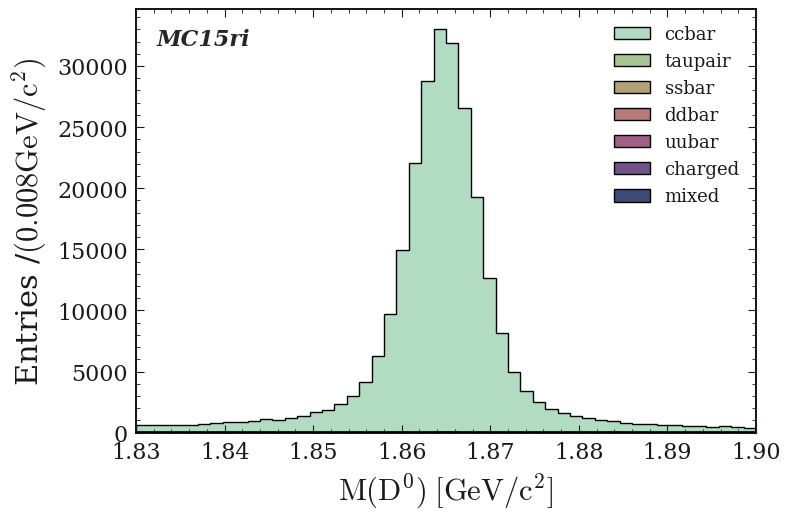

<Figure size 800x550 with 0 Axes>

In [5]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_mixed_0[var] }
    charged_bkg = {var : pd_charged_0[var] }
    ccbar_bkg = {var : pd_ccbar_0[var] }
    uubar_bkg = {var : pd_uubar_0[var] }
    ddbar_bkg = {var : pd_ddbar_0[var] }
    ssbar_bkg = {var : pd_ssbar_0[var] }
    taupair_bkg = {var : pd_taupair_0[var] }
    
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(1.83,1.90)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

D0_M


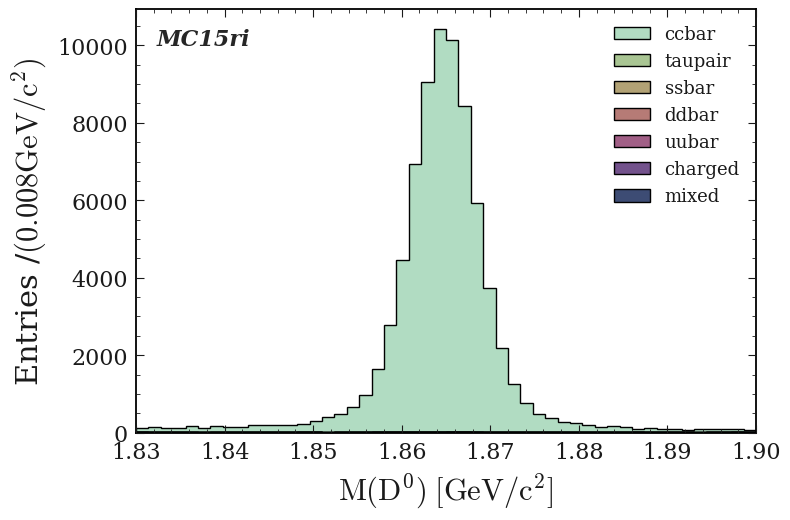

<Figure size 800x550 with 0 Axes>

In [22]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_mixed_0[var] }
    charged_bkg = {var : pd_charged_0[var] }
    ccbar_bkg = {var : pd_ccbar_0[var] }
    uubar_bkg = {var : pd_uubar_0[var] }
    ddbar_bkg = {var : pd_ddbar_0[var] }
    ssbar_bkg = {var : pd_ssbar_0[var] }
    taupair_bkg = {var : pd_taupair_0[var] }
    
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(1.83,1.90)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

__ncandidates__


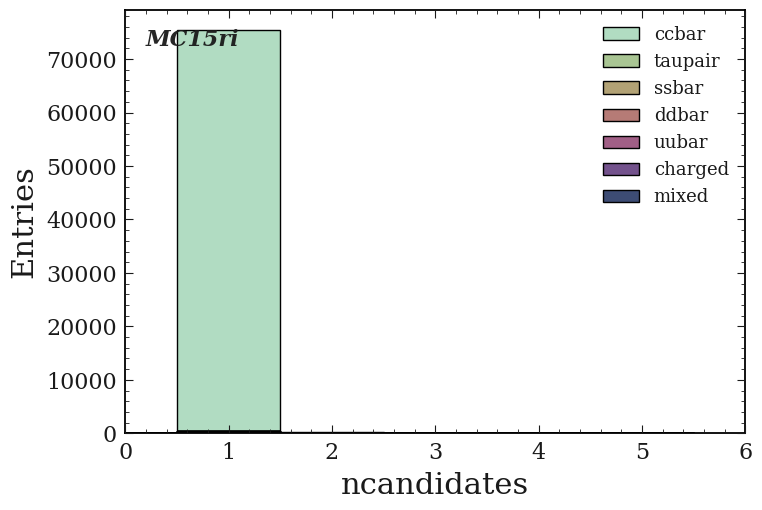

<Figure size 800x550 with 0 Axes>

In [23]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["__ncandidates__"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_mixed_0[var] }
    charged_bkg = {var : pd_charged_0[var] }
    ccbar_bkg = {var : pd_ccbar_0[var] }
    uubar_bkg = {var : pd_uubar_0[var] }
    ddbar_bkg = {var : pd_ddbar_0[var] }
    ssbar_bkg = {var : pd_ssbar_0[var] }
    taupair_bkg = {var : pd_taupair_0[var] }
    
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(0,6)
    xbins = np.linspace(*xrange,7)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black',align="left")
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=5, range=(1,6))

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("ncandidates")
    width = xe[1]-xe[0]
    plt.ylabel('Entries');
    plt.show()
    plt.clf()

In [6]:
# pd_ccbar = get_pd(file=file_ccbar, tree=tree,base_filter=base_filter,variables=variables)
# pd_uubar = get_pd(file=file_uubar, tree=tree,base_filter=base_filter,variables=variables)
# pd_ddbar = get_pd(file=file_ddbar, tree=tree,base_filter=base_filter,variables=variables)
# pd_ssbar = get_pd(file=file_ssbar, tree=tree,base_filter=base_filter,variables=variables)
# pd_charged = get_pd(file=file_charged, tree=tree,base_filter=base_filter,variables=variables)
# pd_mixed = get_pd(file=file_mixed, tree=tree,base_filter=base_filter,variables=variables)
# pd_taupair = get_pd(file=file_taupair, tree=tree,base_filter=base_filter,variables=variables)


pd_all_generic = pd.concat([pd_ccbar_0, pd_uubar_0, pd_ddbar_0, pd_ssbar_0, pd_charged_0, pd_mixed_0, pd_taupair_0], ignore_index=True)

pd_all_generic.describe()

,D0_M,Dstarp_Q,Dstarp_CMS_p,__ncandidates__,Dstarp_isSignal
count,263483.000000,263483.000000,263483.000000,263483.000000,260009.000000
mean,1.864497,0.005875,3.426148,1.002471,0.946290
std,0.008345,0.000222,0.605875,0.049645,0.225444
min,1.830002,0.005330,2.450007,1.000000,0.000000
25%,1.861490,0.005741,2.918023,1.000000,1.000000
50%,1.864659,0.005864,3.370716,1.000000,1.000000
75%,1.867765,0.005994,3.885420,1.000000,1.000000
max,1.899999,0.006530,5.019806,2.000000,1.000000


In [7]:
N_isSignal_1 = len(pd_all_generic.query('Dstarp_isSignal==1'))
print(N_isSignal_1)

246044


In [8]:
np_data = pd_all_generic['D0_M'].to_numpy()

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit' created with bounds [1.83,1.9]
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_extended_model_) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'NormalizationRangeForfit' created with bounds [1.83,1.9]
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit_nll_extended_model_' created with bounds [1.83,1.9]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_extended_model_) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#0] ERROR:Integration --  RooNumIntFactory::Init : libRooFitMore cannot be loaded. GSL integrators will not beavailable ! 
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMo

cling::DynamicLibraryManager::loadLibrary(): libgsl.so.25: cannot open shared object file: No such file or directory
Info in <TCanvas::Print>: png file test.png has been created


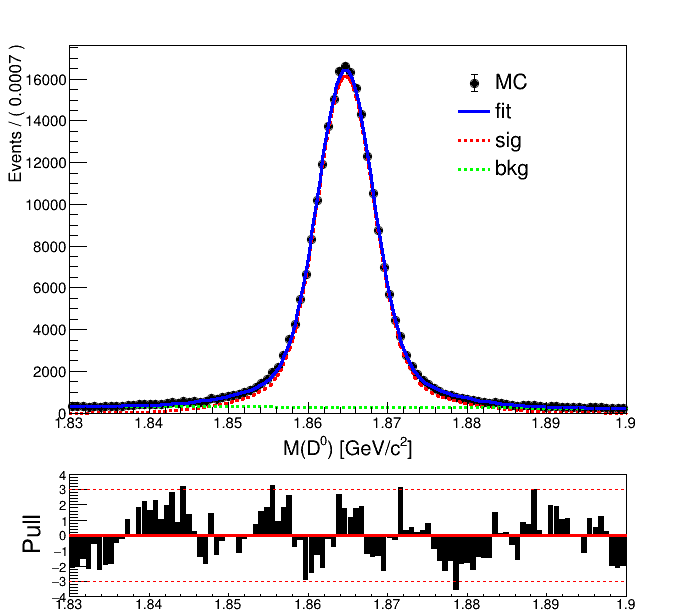

In [9]:
fitting_region = (1.83, 1.90)
x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
# x.setBins(70)


# rooDataSet = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x))), ("D0_M")
# )
# rooDataSet2 = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x, y))), ("D0_M", "Dstarp_Q")
# )


mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.86,1.85, 1.88)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.02,0.001,0.05)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.03,0.001,0.05)
# alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,20)
# n_CB = ROOT.RooRealVar("n_CB", "width of gaussians", 20,0,100)
 
# Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.67,1.93)    
# Novo_width = ROOT.RooRealVar("Novo_widh", "Novo peak", 0.05,0,0.5)    
# Novo_tail = ROOT.RooRealVar("Novo_tail", "Novo peak", 0.5,0,10)    


    
sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig2 = ROOT.RooGaussian("sig2", "Signal component 1", x, mean, sigma2)

sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
sig_model = ROOT.RooAddPdf("sig_model", "Signal1", [sig1, sig2], sig1frac)




c0 = ROOT.RooRealVar("c0", "c0",0.1, -1,1)
c1 = ROOT.RooRealVar("c1", "c1",0.5, -1,1)
#c2 = ROOT.RooRealVar("c2", "c2",-0.3, -1.,0.)
bkg_x_model = ROOT.RooPolynomial("bkg_x_model", "Signal component 1", x, ROOT.RooArgList(c0,c1))
#sig = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
# sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, mean, Novo_width, Novo_tail)





data = ROOT.RooDataSet.from_numpy({"M(D^{0})": np_data}, [x])

# data = rooDataSet

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

nsig = ROOT.RooRealVar("nsig","# signal events",len(np_data)*0.8,0,len(np_data))
nbkg = ROOT.RooRealVar("nbkg","# bkg events",len(np_data)*0.2,0, len(np_data))

extended_model = ROOT.RooAddPdf("extended_model", "x_model", ROOT.RooArgSet(sig_model,bkg_x_model), ROOT.RooArgSet(nsig, nbkg))


r = extended_model.fitTo(data,NumCPU=12, Range=fitting_region)
# r = sig.fitTo(data,NumCPU=12, Range=fitting_region)

# r.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

data.plotOn(frame,Name = "data1", XErrorSize=0)

# sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)


# extended_model.plotOn(frame, Name="sig1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=ROOT.kBlue)

# extended_model.plotOn(frame, Name="sig2", Components=sig2, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen)


extended_model.plotOn(frame, Name="sig", Components=ROOT.RooArgSet(sig1,sig2), LineStyle=ROOT.kDashed, LineColor=ROOT.kRed)



extended_model.plotOn(frame, Name="bkg", Components=bkg_x_model, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen)

extended_model.plotOn(frame, Name="fitting")





# sig.paramOn(frame)
frame.GetXaxis().SetTitleSize(0.047)
frame.GetXaxis().CenterTitle(True)
frame.GetYaxis().SetTitleSize(0.04)
frame.GetYaxis().SetTitleOffset(1.2)
frame.Draw("PE")

leg1 = ROOT.TLegend(0.65, 0.6, 0.9, 0.85)
# leg1 = ROOT.TLegend(0.75, 0.75, 0.9, 0.9)
leg1.SetFillColor(0)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
# leg1.AddEntry("sig1", "sig1", "l")
# leg1.AddEntry("sig2", "sig1", "l")

leg1.AddEntry("sig", "sig", "l")
leg1.AddEntry("bkg", "bkg", "l")
leg1.SetTextSize(0.05)
leg1.SetBorderSize(0)

leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.17)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.1)
pullplot.GetYaxis().SetLabelSize(0.09)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs("test.png")

In [10]:
print(nsig)
print(nbkg)


RooRealVar::nsig = 235645 +/- 619.327  L(0 - 263483) 

RooRealVar::nbkg = 27840.8 +/- 419.264  L(0 - 263483) 



In [27]:
print(nsig)
print(nbkg)


RooRealVar::nsig = 70080.9 +/- 292.645  L(0 - 75747) 

RooRealVar::nbkg = 5667.61 +/- 146.239  L(0 - 75747) 

